# Coursera Data Science Capstone - New York City Rental Market Analysis

## Part 2 Data adquisition and cleaning

In [41]:
# Import libraries
import numpy as np
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
!pip install folium
import folium # map rendering library

In [8]:
# Adquire NY Data (json file)
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [9]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
neighborhoods_data = newyork_data['features']
neighborhoods_data[0] # First data item

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [10]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns = column_names)

# loop to fill the dataframe
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
print(neighborhoods.shape)
neighborhoods.head()

(306, 4)


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [11]:
# convert an address into latitude and longitude values

address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
ny_latitude = location.latitude
ny_longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(ny_latitude, ny_longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [264]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [13]:
# Read Zillow Condo Data mid-Tier
zillow_df = pd.read_csv('http://files.zillowstatic.com/research/public_v2/zhvi/Neighborhood_zhvi_uc_condo_tier_0.33_0.67_sm_sa_mon.csv')

ny_df = zillow_df[zillow_df.City == 'New York'] # remove all cities other than ny
ny_df.drop(['RegionID','SizeRank','RegionType','StateName','State','City','Metro','CountyName'], axis=1, inplace=True) # remove columns
ny_df.rename(columns=lambda x: x[0:7], inplace=True) # Rename Columns to YYYY-MM
ny_df.rename(columns={'RegionN':'Neighborhood'}, inplace=True) # Rename Index
ny_df.set_index('Neighborhood', inplace=True) # Set new Index

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [14]:
#Print Shape and Head
print(ny_df.shape)
ny_df.head()

(190, 294)


,1996-01,1996-02,1996-03,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Upper West Side,281591.0,281154.0,281289.0,282070.0,283062.0,284082.0,284148.0,284299.0,284374.0,285315.0,...,1233923.0,1226329.0,1228089.0,1234873.0,1232891.0,1228788.0,1218444.0,1218807.0,1214683.0,1210707.0
Upper East Side,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,929593.0,927350.0,926257.0,927430.0,927683.0,929749.0,925260.0,925438.0,925215.0,933518.0
East New York,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,341233.0,340846.0,340971.0,340998.0,342076.0,343255.0,344385.0,345332.0,345130.0,345802.0
Washington Heights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,566566.0,560402.0,556665.0,552960.0,548861.0,544782.0,541350.0,538371.0,533715.0,531615.0
Astoria,117760.0,117022.0,117533.0,118159.0,119322.0,119616.0,119811.0,120111.0,120615.0,121277.0,...,513852.0,514333.0,513360.0,514066.0,514298.0,514380.0,513222.0,513961.0,514368.0,515600.0


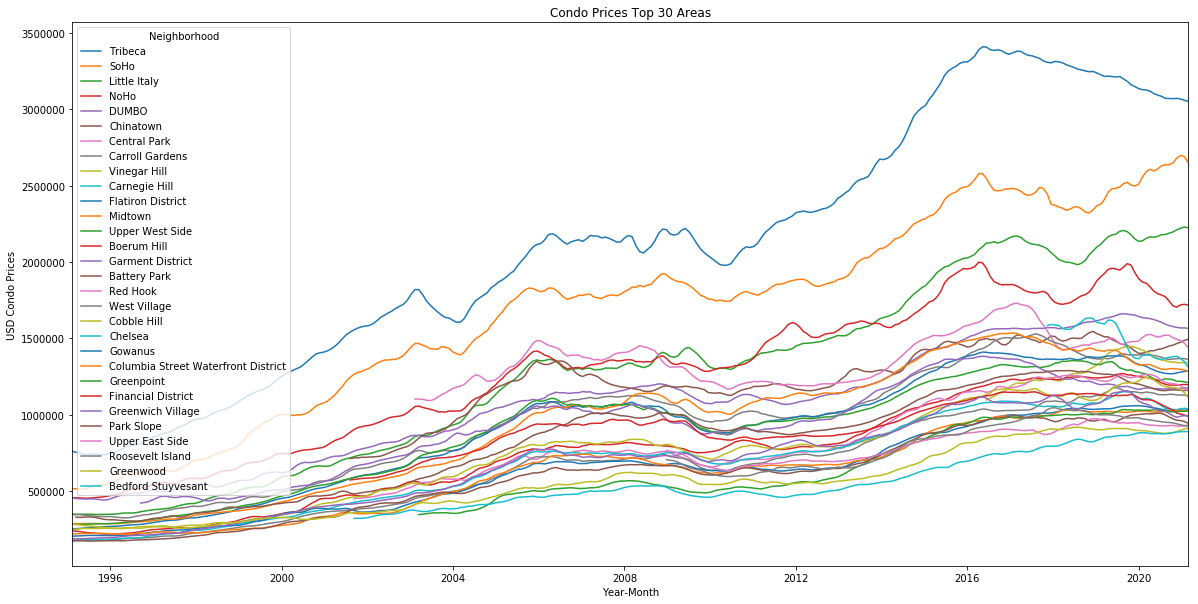

In [60]:
ny_df_sort = ny_df.sort_values(by='2020-06', ascending=False) # Sort Neigborhoods by latest Condo Prices in Descending order
ny_top30 = ny_df_sort.head(30).transpose()
ny_top30.plot(kind='line', figsize=(20, 10))
plt.title('Condo Prices Top 30 Areas')
plt.ylabel('USD Condo Prices')
plt.xlabel('Year-Month')
plt.xticks([10, 55, 100, 145, 190, 235, 280 ],['1996','2000','2004','2008','2012','2016','2020'])
plt.show()

In [62]:
# Foursquare credentials and version
CLIENT_ID = 'V0I11RSWG1KIRXIIRUQLL0FEA4HLGJZC0HZ2COCYQZ1EHQZJ' # your Foursquare ID
CLIENT_SECRET = 'HKMYO3VS1CAZG4KPVOJOO1OT0FMFV0NQATXQK1P3RARXHZ5M' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ny_latitude, 
    ny_longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f3c1865fc4b672a308a858d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Downtown Manhattan',
  'headerFullLocation': 'Downtown Manhattan, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 237,
  'suggestedBounds': {'ne': {'lat': 40.72172810900001,
    'lng': -73.99416384126839},
   'sw': {'lat': 40.70372809099999, 'lng': -74.0178665587316}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57f0689d498e7d49d9189369',
       'name': 'The Bar Room at Temple Court',
       'location': {'address': '123 Nassau St',
        'lat': 40.7114477287544,
        'lng': -74.00680157032005,
 

In [63]:
from pandas.io.json import json_normalize

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,The Bar Room at Temple Court,Hotel Bar,40.711448,-74.006802
1,"The Beekman, A Thompson Hotel",Hotel,40.711173,-74.006702
2,Alba Dry Cleaner & Tailor,Laundry Service,40.711434,-74.006272
3,Gibney Dance Center Downtown,Dance Studio,40.713923,-74.005661
4,The Class by Taryn Toomey,Gym / Fitness Center,40.712753,-74.008734


In [68]:
# Function to extract all neighborhoods
LIMIT = 200

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [147]:
df_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont


KeyError: 'groups'

In [70]:
print(df_venues.shape)
df_venues.head()

(10058, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
3,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
4,Wakefield,40.894705,-73.847201,Shell,40.894187,-73.845862,Gas Station


In [122]:
# Select top 30 dataframe by number of venues
top_30_df= df_venues.groupby('Neighborhood').count().sort_values(by='Venue', ascending=False).head(30)
top_30_df.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Murray Hill,147,147,147,147,147,147
Chelsea,105,105,105,105,105,105
Lenox Hill,100,100,100,100,100,100
Little Italy,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100


In [150]:
# Compare (Zillow) NY Dataframe with Venues Data Frame
top_30_NB = list(top_30_df.index)
ny_df_by_venues = ny_df[ny_df.index.isin(top_30_NB)]
print(ny_df_by_venues.shape)
ny_df_by_venues.head()

(20, 294)


,1996-01,1996-02,1996-03,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Astoria,117760.0,117022.0,117533.0,118159.0,119322.0,119616.0,119811.0,120111.0,120615.0,121277.0,...,513852.0,514333.0,513360.0,514066.0,514298.0,514380.0,513222.0,513961.0,514368.0,515600.0
Murray Hill,90486.0,89890.0,89478.0,88786.0,88736.0,88725.0,88582.0,88083.0,87520.0,87317.0,...,323865.0,326460.0,328951.0,332015.0,334242.0,337707.0,339396.0,342159.0,344970.0,349385.0
East Village,209020.0,208056.0,207844.0,207506.0,208154.0,208467.0,208429.0,207961.0,208169.0,208520.0,...,871768.0,867658.0,866079.0,868229.0,871270.0,866103.0,853461.0,831292.0,805133.0,783746.0
Chelsea,173801.0,174256.0,175606.0,178171.0,180591.0,181802.0,181661.0,181307.0,181611.0,182883.0,...,1090815.0,1074677.0,1058173.0,1041475.0,1037515.0,1033863.0,1032417.0,1038955.0,1041536.0,1037893.0
Greenwich Village,186379.0,185906.0,186356.0,187011.0,188494.0,189651.0,190584.0,191444.0,192703.0,193749.0,...,1041734.0,1028396.0,1024174.0,1022018.0,1007759.0,992052.0,983049.0,989934.0,993511.0,990262.0


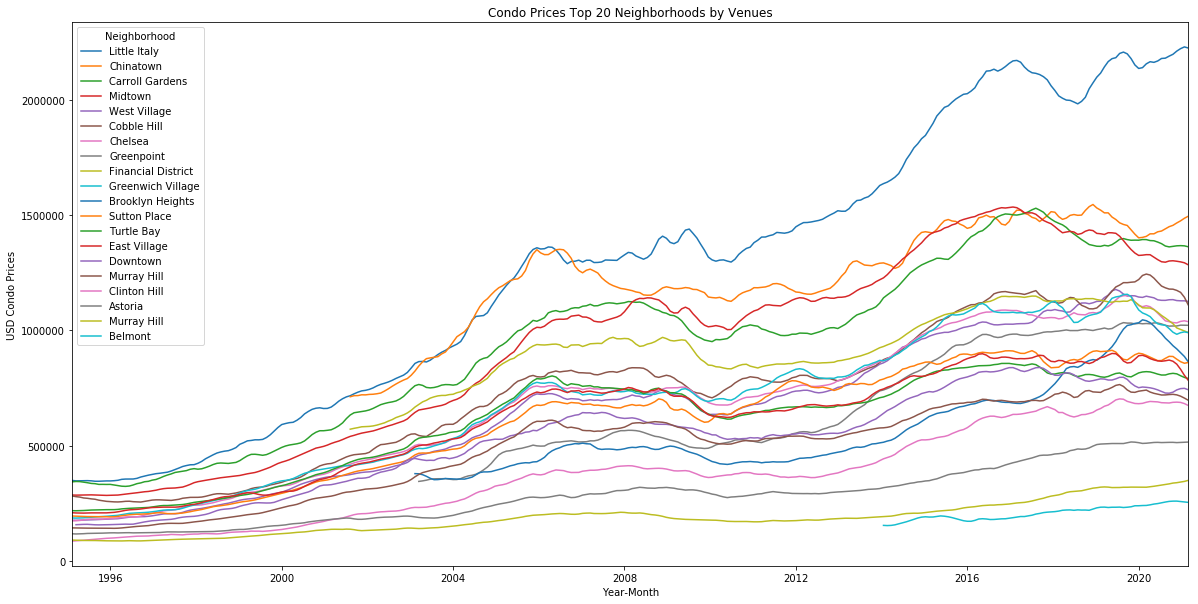

In [151]:
# Plot Top 20 Neighborhoods by Venues
ny_df_by_venues = ny_df_by_venues.sort_values(by='2020-06', ascending=False) # Sort Neigborhoods by latest Condo Prices in Descending order
ny_top20 = ny_df_by_venues.head(20).transpose()
ny_top20.plot(kind='line', figsize=(20, 10))
plt.title('Condo Prices Top 20 Neighborhoods by Venues')
plt.ylabel('USD Condo Prices')
plt.xlabel('Year-Month')
plt.xticks([10, 55, 100, 145, 190, 235, 280 ],['1996','2000','2004','2008','2012','2016','2020'])
plt.show()

In [158]:
# Reduce the Venues dataframe by top venues

top_20_NB = list(ny_df_by_venues.index)
df_topvenues = df_venues[df_venues['Neighborhood'].isin(top_20_NB)]
print(df_topvenues.shape)
df_topvenues.head()

(1939, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
753,Belmont,40.857277,-73.888452,Tino's Delicatessen,40.855882,-73.887166,Italian Restaurant
754,Belmont,40.857277,-73.888452,Casa Della Mozzarella,40.855440,-73.887373,Deli / Bodega
755,Belmont,40.857277,-73.888452,Full Moon Pizzeria,40.855506,-73.887557,Pizza Place
756,Belmont,40.857277,-73.888452,DeLillo Pastry Shop,40.855364,-73.887198,Dessert Shop
757,Belmont,40.857277,-73.888452,Gino's Pastry Shop,40.855648,-73.888196,Dessert Shop


In [160]:
print('There are {} uniques venues categories.'.format(len(df_topvenues['Venue Category'].unique())))

There are 279 uniques venues categories.


In [216]:
# Analyze Each Neighborhood with one hot encoding

# one hot encoding
ny_onehot = pd.get_dummies(df_topvenues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = df_topvenues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

# Group rows by Neigborhood and average the ocurrence of the venues categories
ny_grouped = ny_onehot.groupby('Neighborhood').mean().reset_index()

#Print Shape and Data Frame head
print(ny_grouped.shape)
ny_grouped

(19, 280)


,Neighborhood,Accessories Store,Adult Boutique,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Astoria,0.00,0.00,0.010000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.020000,0.000000,0.000000,0.000000
1,Belmont,0.00,0.00,0.010417,0.00,0.00,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.010417,0.000000,0.000000
2,Brooklyn Heights,0.00,0.00,0.010000,0.00,0.00,0.000000,0.000000,0.000000,0.020000,...,0.00,0.00,0.010000,0.000000,0.00,0.010000,0.020000,0.000000,0.010000,0.040000
3,Carroll Gardens,0.00,0.00,0.010000,0.00,0.00,0.000000,0.000000,0.010000,0.000000,...,0.00,0.01,0.000000,0.000000,0.00,0.020000,0.030000,0.010000,0.000000,0.000000
4,Chelsea,0.00,0.00,0.038095,0.00,0.00,0.000000,0.047619,0.000000,0.009524,...,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.009524,0.000000,0.009524,0.000000
5,Chinatown,0.00,0.00,0.030000,0.00,0.00,0.000000,0.000000,0.000000,0.020000,...,0.00,0.00,0.040000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.010000
6,Clinton Hill,0.00,0.00,0.000000,0.00,0.00,0.000000,0.010638,0.021277,0.000000,...,0.00,0.00,0.010638,0.000000,0.00,0.010638,0.042553,0.000000,0.000000,0.031915
7,Cobble Hill,0.00,0.00,0.010309,0.00,0.00,0.010309,0.010309,0.010309,0.000000,...,0.00,0.00,0.000000,0.010309,0.00,0.010309,0.020619,0.000000,0.000000,0.030928
8,Downtown,0.00,0.00,0.020000,0.01,0.00,0.000000,0.000000,0.020000,0.010000,...,0.00,0.00,0.010000,0.000000,0.00,0.010000,0.010000,0.000000,0.000000,0.010000
9,East Village,0.00,0.00,0.010000,0.00,0.01,0.010000,0.010000,0.010000,0.000000,...,0.00,0.00,0.030000,0.000000,0.00,0.040000,0.010000,0.000000,0.000000,0.000000


In [180]:
# Function to sort the venues

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

# create the new dataframe and display the top 10 venues for each neighborhood
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ny_grouped['Neighborhood']

for ind in np.arange(ny_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted

(19, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Astoria,Bar,Middle Eastern Restaurant,Greek Restaurant,Hookah Bar,Indian Restaurant,Seafood Restaurant,Bakery,Mediterranean Restaurant,Café,Gourmet Shop
1,Belmont,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Grocery Store,Dessert Shop,Donut Shop,Bank,Café,Shoe Store
2,Brooklyn Heights,Yoga Studio,Park,Deli / Bodega,Italian Restaurant,Cosmetics Shop,Gym,Bakery,Pizza Place,Mexican Restaurant,Ice Cream Shop
3,Carroll Gardens,Italian Restaurant,Coffee Shop,Bakery,Pizza Place,Cocktail Bar,Spa,Bar,Wine Shop,French Restaurant,Food & Drink Shop
4,Chelsea,Coffee Shop,Art Gallery,American Restaurant,Italian Restaurant,Bakery,Ice Cream Shop,Hotel,Seafood Restaurant,Sushi Restaurant,Nightclub
5,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,Vietnamese Restaurant,Dessert Shop,Spa,American Restaurant,Salon / Barbershop,Noodle House,Optical Shop
6,Clinton Hill,Italian Restaurant,Pizza Place,Thai Restaurant,Wine Shop,Japanese Restaurant,Mexican Restaurant,Chinese Restaurant,Diner,Indian Restaurant,Restaurant
7,Cobble Hill,Playground,Bar,Cocktail Bar,Coffee Shop,Pizza Place,Yoga Studio,Deli / Bodega,Italian Restaurant,Middle Eastern Restaurant,Bike Rental / Bike Share
8,Downtown,Burger Joint,Coffee Shop,Pizza Place,Sandwich Place,Grocery Store,Chinese Restaurant,Bar,French Restaurant,Performing Arts Venue,Cocktail Bar
9,East Village,Bar,Pizza Place,Mexican Restaurant,Ice Cream Shop,Cocktail Bar,Wine Bar,Vietnamese Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Korean Restaurant


In [231]:
ny_df_prices = ny_df_by_venues[['2020-06']]
ny_df_prices.rename(columns={'2020-06':'condo value index($)'}, inplace=True)
neighborhoods_venues_by_condo_value=pd.merge(ny_df_prices,neighborhoods_venues_sorted, on='Neighborhood')
neighborhoods_venues_by_condo_value

,Neighborhood,condo value index($),1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Little Italy,2224698.0,Bakery,Café,Italian Restaurant,Bubble Tea Shop,Coffee Shop,Cocktail Bar,Salon / Barbershop,Pizza Place,Mediterranean Restaurant,Ice Cream Shop
1,Chinatown,1494949.0,Chinese Restaurant,Bakery,Cocktail Bar,Vietnamese Restaurant,Dessert Shop,Spa,American Restaurant,Salon / Barbershop,Noodle House,Optical Shop
2,Carroll Gardens,1362646.0,Italian Restaurant,Coffee Shop,Bakery,Pizza Place,Cocktail Bar,Spa,Bar,Wine Shop,French Restaurant,Food & Drink Shop
3,Midtown,1284458.0,Coffee Shop,Clothing Store,Hotel,Bakery,Theater,Sporting Goods Shop,Sandwich Place,Bookstore,Steakhouse,Gym
4,West Village,1125683.0,Italian Restaurant,American Restaurant,New American Restaurant,Cocktail Bar,Wine Bar,Park,Pizza Place,Jazz Club,Cosmetics Shop,Theater
5,Cobble Hill,1110841.0,Playground,Bar,Cocktail Bar,Coffee Shop,Pizza Place,Yoga Studio,Deli / Bodega,Italian Restaurant,Middle Eastern Restaurant,Bike Rental / Bike Share
6,Chelsea,1037893.0,Coffee Shop,Art Gallery,American Restaurant,Italian Restaurant,Bakery,Ice Cream Shop,Hotel,Seafood Restaurant,Sushi Restaurant,Nightclub
7,Greenpoint,1022042.0,Bar,Coffee Shop,Pizza Place,Cocktail Bar,Yoga Studio,Mexican Restaurant,French Restaurant,Deli / Bodega,Flower Shop,Thrift / Vintage Store
8,Financial District,990869.0,Coffee Shop,Pizza Place,Cocktail Bar,Bar,Hotel,Gym / Fitness Center,Salad Place,Café,Steakhouse,Italian Restaurant
9,Greenwich Village,990262.0,Italian Restaurant,Sushi Restaurant,Café,Clothing Store,Ice Cream Shop,Gym,Dessert Shop,Chinese Restaurant,Indian Restaurant,Bubble Tea Shop


In [237]:
# Top 10 venues preferences provided by Client (Analyst's Wife)
Client_Top10_Venues=['Gym','Mediterranean Restaurant', 'Mexican Restaurant','Pub','Restaurant','Sandwich Place','Spa','Steakhouse','Sushi Restaurant','Yoga Studio']

In [268]:
# Multiply Preferences to Produce a Ranking (like a recommender system) and merge tables
ny_grouped_wo_index = ny_grouped.set_index('Neighborhood')
ny_reduced = ny_grouped_wo_index[Client_Top10_Venues]
ny_reduced['Total']=ny_reduced.sum(axis=1)
neighborhoods_value = neighborhoods_venues_by_condo_value.set_index('Neighborhood').sort_index(axis = 0)
neighborhoods_value_index = pd.merge(neighborhoods_value[['condo value index($)']],ny_reduced[['Total']], on='Neighborhood')
neighborhoods_value_index['Ranking'] = neighborhoods_value_index['condo value index($)']*neighborhoods_value_index['Total']/(200222.82)
neighborhoods_value_index.sort_values(by='Ranking', ascending=False).round(2)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,condo value index($),Total,Ranking
Neighborhood,,,
Little Italy,2224698.0,0.09,1.00
Midtown,1284458.0,0.15,0.96
Chinatown,1494949.0,0.09,0.67
Financial District,990869.0,0.13,0.64
Greenwich Village,990262.0,0.13,0.64
Greenpoint,1022042.0,0.12,0.61
Cobble Hill,1110841.0,0.10,0.57
Clinton Hill,674418.0,0.16,0.54
Brooklyn Heights,863929.0,0.11,0.47


In [265]:
# create map of New York using latitude and longitude values of the top neighborhoods

top_neighborhoods = neighborhoods[neighborhoods['Neighborhood'].isin(top_20_NB)]

map_newyork = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(top_neighborhoods['Latitude'], top_neighborhoods['Longitude'], top_neighborhoods['Borough'], top_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork